In [20]:
import pandas as pd
import numpy as np
import collections

In [21]:
opcode=pd.read_csv('opcode.csv')

In [22]:
opcode['Opcode']=opcode['Opcode'].str.strip()

In [23]:
series = pd.Series(opcode['Opcode'], index=opcode.index)

In [24]:
data_list=series.tolist()

Counter = collections.Counter(data_list)
top_29_opcodes=Counter.most_common(29)
#print(top_29_opcodes)
top_30=[]
opcode_dict={}
for o in top_29_opcodes:
    top_30.append(o[0])
    

top_30.append('other')
print(top_30)
for i in range(len(top_30)):
    opcode_dict[top_30[i]]=i
opcode_dict['other']=29

['mov', 'call', 'pop', 'push', 'lea', 'test', 'je', 'jmp', 'xor', 'add', 'cmp', 'ret', 'jne', 'movsd', 'sub', 'movaps', 'movss', 'movapd', 'xorps', 'movsxd', 'inc', 'movzx', 'movq', 'js', 'xorpd', 'jb', 'addsd', 'movdqa', 'or', 'other']


In [25]:
opcode_data=[]

for i in data_list:
    #print(i)
    if i in opcode_dict:
        
        opcode_data.append(i)
    else:
        opcode_data.append('other')
        
data_fin=[]

for i in opcode_data:
    
    if i in opcode_dict:
        data_fin.append(opcode_dict.get(i))

In [26]:
opcode_data
df = pd.DataFrame({'Opcode':opcode_data})


In [27]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(df['Opcode'])


LabelEncoder()

In [28]:
opcode_nums=le.transform(df['Opcode']) 


In [29]:
opcode_nums

findf=pd.DataFrame({'opcode_nums':opcode_nums.tolist()})


findf


export_csv = findf.to_csv (r'opcode_num1.csv', index = None, header=True)

In [30]:
from hmmlearn.hmm import GaussianHMM

In [31]:
hmmmodels=[]

model = GaussianHMM(n_components=3,covariance_type="diag")
X=opcode_nums.reshape(-1,1)
model=model.fit(X)
actual,sc=model.decode(X)
b=np.exp(sc) 

actual


43257.19568078889

In [32]:
# Scoring Benign sample with model
score_hmm=[]

test_opcode=pd.read_csv('opcode.csv')
testset=test_opcode['Opcode']
tes_set=testset.tolist()
test_opcode_data=[]

for i in tes_set:
    #print(i)
    if i in opcode_dict:
        
        test_opcode_data.append(i)
    else:
        test_opcode_data.append('other')
test_df = pd.DataFrame({'Opcode':test_opcode_data})

from sklearn import preprocessing


le = preprocessing.LabelEncoder()

le.fit(test_df['Opcode'])


test_opcode_nums=le.transform(test_df['Opcode']) 

Y=test_opcode_nums.reshape(-1,1)
score,pred_model=model.decode(Y)
score_hmm.append(score)

In [33]:
test_opcode=pd.read_csv('Datasets/dead_code_inserted_seq_dF_5.csv')
testset=test_opcode['Opcode']
tes_set=testset.tolist()
test_opcode_data=[]

for i in tes_set:
    #print(i)
    if i in opcode_dict:
        
        test_opcode_data.append(i)
    else:
        test_opcode_data.append('other')
test_df = pd.DataFrame({'Opcode':test_opcode_data})

from sklearn import preprocessing


le = preprocessing.LabelEncoder()

le.fit(test_df['Opcode'])


test_opcode_nums=le.transform(test_df['Opcode']) 

Y=test_opcode_nums.reshape(-1,1)
score,pred_model=model.decode(Y)
score_hmm.append(score)

In [34]:
#Scoring morphed samples with model



for i in range(1,10):

    test_opcode=pd.read_csv('Datasets/dead_code_inserted_seq_dF_{}0.csv'.format(i))
    testset=test_opcode['Opcode']
    tes_set=testset.tolist()
    test_opcode_data=[]

    for i in tes_set:
    #print(i)
        if i in opcode_dict:
        
            test_opcode_data.append(i)
        else:
            test_opcode_data.append('other')
    test_df = pd.DataFrame({'Opcode':test_opcode_data})

    from sklearn import preprocessing


    le = preprocessing.LabelEncoder()

    le.fit(test_df['Opcode'])


    test_opcode_nums=le.transform(test_df['Opcode']) 

    Y=test_opcode_nums.reshape(-1,1)
    score,pred_model=model.decode(Y)
    score_hmm.append(score)


In [35]:
score_hmm

[43257.19568078889,
 40709.56878110585,
 38862.73247794559,
 33972.172950399116,
 29546.88917825156,
 25253.699851522444,
 20815.81537789642,
 16359.989767707708,
 11809.452258200236,
 7319.46019554853,
 2556.7564989656257]

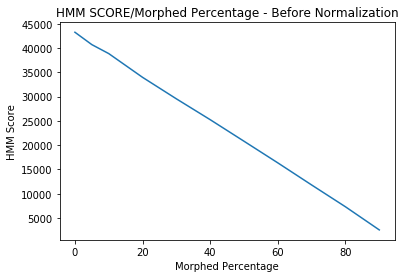

In [37]:
score_hmm
import matplotlib.pyplot as plt
y=[0, 5,10, 20, 30, 40, 50, 60, 70, 80, 90]

plt.plot( y,score_hmm) 
plt.xlabel("Morphed Percentage")
plt.ylabel("HMM Score")
plt.title("HMM SCORE/Morphed Percentage - Before Normalization")
plt.show()

In [38]:
score_hmm

from sklearn.preprocessing import normalize
score_fin=normalize(np.asarray(score_hmm).reshape(1, -1), norm="max")

score_fin

array([[1.        , 0.94110513, 0.89841082, 0.78535311, 0.68305143,
        0.58380344, 0.48121047, 0.37820274, 0.2730055 , 0.16920792,
        0.05910592]])

In [39]:
x=score_fin.tolist()[0]
x

[1.0,
 0.941105130381476,
 0.898410816196415,
 0.7853531052057223,
 0.6830514256238237,
 0.5838034448159559,
 0.4812104679994548,
 0.37820273622067924,
 0.27300549821460046,
 0.16920792206599747,
 0.059105923505372214]

In [40]:
y=[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]
y

[0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [41]:
import matplotlib.pyplot as plt

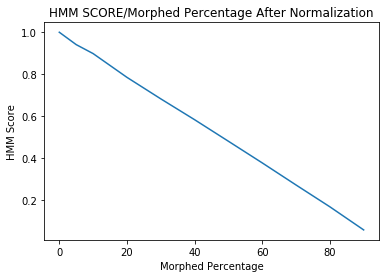

In [42]:
plt.plot( y,x) 
plt.xlabel("Morphed Percentage")
plt.ylabel("HMM Score")
plt.title("HMM SCORE/Morphed Percentage After Normalization")
plt.show()

In [43]:
# With conditional jumps HMM
hmmjmp=[]

for i in range(2,12):

    test_opcode=pd.read_csv('Datasets/Morphed_{}.csv'.format(i))
    testset=test_opcode['0']
    tes_set=testset.tolist()
    test_opcode_data=[]

    for i in tes_set:
    #print(i)
        if i in opcode_dict:
        
            test_opcode_data.append(i)
        else:
            test_opcode_data.append('other')
    test_df = pd.DataFrame({'Opcode':test_opcode_data})

    from sklearn import preprocessing


    le = preprocessing.LabelEncoder()

    le.fit(test_df['Opcode'])


    test_opcode_nums=le.transform(test_df['Opcode']) 

    Y=test_opcode_nums.reshape(-1,1)
    score,pred_model=model.decode(Y)
    hmmjmp.append(score)

In [44]:
hmmjmp

[43231.152184345076,
 43224.41974201709,
 43224.46264800483,
 43243.99696239727,
 43203.11672971216,
 43207.22641344181,
 43220.35910766336,
 43211.52668973869,
 43218.25840459941,
 43209.91610934461]

In [47]:
y=[i for i in range(2,12)]
y

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

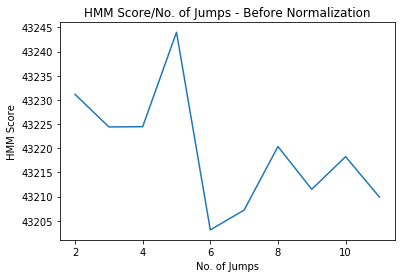

In [50]:
plt.plot( y,hmmjmp) 
plt.xlabel("No. of Jumps")
plt.ylabel("HMM Score")
plt.title("HMM Score/No. of Jumps - Before Normalization")
plt.show()

In [51]:
from sklearn.preprocessing import normalize
hmmjmp_after=normalize(np.asarray(hmmjmp).reshape(1, -1), norm="max")

hmm_af=hmmjmp_after.tolist()[0]
hmm_af

[0.9997029696847087,
 0.9995472846694258,
 0.9995482768530988,
 1.0,
 0.9990546610961826,
 0.9991496958759978,
 0.9994533841366591,
 0.9992491380321108,
 0.9994048062250064,
 0.9992118940096518]

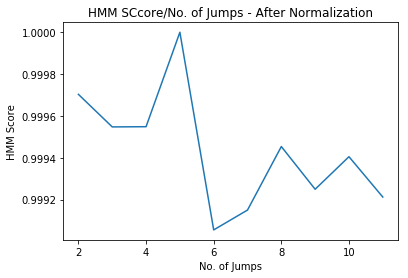

In [52]:
plt.plot( y,hmmjmp_after.tolist()[0]) 
plt.xlabel("No. of Jumps")
plt.ylabel("HMM Score")
plt.title("HMM SCcore/No. of Jumps - After Normalization")
plt.show()

In [56]:
# SVM Scores

hmm_fin=[]

hmm_fin= hmm_af+x
hmm_fin

[0.9997029696847087,
 0.9995472846694258,
 0.9995482768530988,
 1.0,
 0.9990546610961826,
 0.9991496958759978,
 0.9994533841366591,
 0.9992491380321108,
 0.9994048062250064,
 0.9992118940096518,
 1.0,
 0.941105130381476,
 0.898410816196415,
 0.7853531052057223,
 0.6830514256238237,
 0.5838034448159559,
 0.4812104679994548,
 0.37820273622067924,
 0.27300549821460046,
 0.16920792206599747,
 0.059105923505372214]

In [93]:
SVM_Y=[1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
SVM_Y= np.array(SVM_Y)
SVM_Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

10
20
30
40
50
60
70
80
90


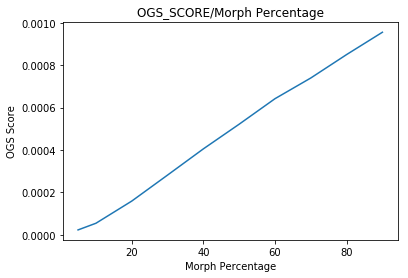

In [61]:
import numpy

def get_ogs_matrix(data,opcode_dict,top_29):
    ogs_matrix=[[0 for i in range(30)] for j in range(30)]

    for i in range(len(data)-1):
        opcode1=data[i]
        opcode2=data[i+1]
        if opcode1 in top_29:
            row_index=opcode_dict[opcode1]
        else:
            row_index=opcode_dict['other']
        if opcode2 in top_29:
            col_index=opcode_dict[opcode2]
        else:
            col_index=opcode_dict['other']
        ogs_matrix[row_index][col_index]+=1
    ogs_numpy=numpy.asarray(ogs_matrix)
    #print(ogs_numpy)
    row_sums = ogs_numpy.sum(axis=1)
    #print(row_sums)
    
    ogs_matrix_normalized = ogs_numpy / row_sums[:, numpy.newaxis]
    return ogs_matrix_normalized


import numpy as np
def get_ogs_score(mat1,mat2):
    x=np.subtract(mat1,mat2)
    p=np.square(x)
    
    return np.nansum(p)/(30)**2



import pandas as pd
opcode1=pd.read_csv('opcode.csv')
opcode1['Opcode']=opcode1['Opcode'].str.strip()
series1 = pd.Series(opcode1['Opcode'], index=opcode1.index)
data_final1=series1.tolist()
import collections
Counter = collections.Counter(data_final1)
top_29_opcodes=Counter.most_common(29)
top_29=[]
opcode_dict={}
for o in top_29_opcodes:
    top_29.append(o[0])
for i in range(len(top_29)):
    opcode_dict[top_29[i]]=i
opcode_dict['other']=29



o=get_ogs_matrix(data_final1,opcode_dict,top_29)
ogs_score_list=[]

dead_code=pd.read_csv('Datasets/dead_code_inserted_seq_dF_5.csv')
dead_code_series = pd.Series(dead_code['Opcode'], index=dead_code.index)
    
dead_code_final=dead_code_series.tolist()
d=get_ogs_matrix(dead_code_final,opcode_dict,top_29)
ogs_score_list.append(get_ogs_score(o,d))
for i in range(10,100,10):
    dead_code=pd.read_csv('Datasets/dead_code_inserted_seq_dF_{}.csv'.format(i))
    dead_code_series = pd.Series(dead_code['Opcode'], index=dead_code.index)
    
    dead_code_final=dead_code_series.tolist()
    d=get_ogs_matrix(dead_code_final,opcode_dict,top_29)
    o=get_ogs_matrix(data_final1,opcode_dict,top_29)
    print(i)
    ogs_score_list.append(get_ogs_score(o,d))


y=ogs_score_list
x=[5,10,20,30,40,50,60,70,80,90]
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.ylabel("OGS Score")
plt.xlabel("Morph Percentage")
plt.title("OGS_SCORE/Morph Percentage")
plt.show()

2
3
4
5
6
7
8
9
10
11


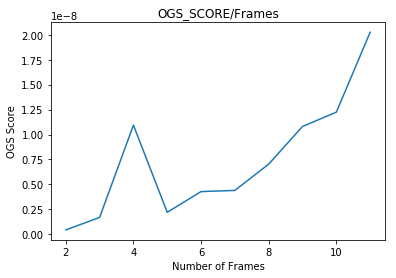

In [62]:
ogs_score_list_MORPHED=[]

for i in range(2,12):
    morphed_code=pd.read_csv('Datasets/Morphed_{}.csv'.format(i))
    morphed_code_series = pd.Series(morphed_code['0'], index=morphed_code.index)
    
    morphed_code_final=morphed_code_series.tolist()
    m=get_ogs_matrix(morphed_code_final,opcode_dict,top_29)
    o=get_ogs_matrix(data_final1,opcode_dict,top_29)
    print(i)
    ogs_score_list_MORPHED.append(get_ogs_score(o,m))

import matplotlib.pyplot as plt

y=ogs_score_list_MORPHED
x=[i for i in range(2,12)]

plt.plot(x,y)
plt.ylabel("OGS Score")
plt.xlabel("Number of Frames")
plt.title("OGS_SCORE/Frames")
plt.show()


In [64]:
from sklearn.preprocessing import normalize
u=normalize(np.asarray(ogs_score_list_MORPHED).reshape(1, -1), norm="max")

b=[0]+u[0].tolist()


w=normalize(np.asarray(ogs_score_list).reshape(1, -1), norm="max").tolist()[0]


# SVM Scores

OGS_X=[]

OGS_X= b+w
OGS_X

[0,
 0.021693424799347015,
 0.08343474478655068,
 0.5401846806537486,
 0.10885067250406198,
 0.21143150351749856,
 0.21720252374594975,
 0.34746107475180454,
 0.5336697124698166,
 0.6044661133279748,
 1.0,
 0.023545117317278416,
 0.056497658824664614,
 0.1659898208817887,
 0.29446545076457653,
 0.4239343413926722,
 0.5458176941374047,
 0.6717494873461815,
 0.7740428318323826,
 0.889699858140429,
 1.0]

In [90]:
feature=[[0,0] for i in range(21)]
for i in range(21):
    feature[i][0]=hmm_fin[i]
    feature[i][1]=OGS_X[i]
feature=np.array(feature)

In [91]:
feature

array([[0.99970297, 0.        ],
       [0.99954728, 0.02169342],
       [0.99954828, 0.08343474],
       [1.        , 0.54018468],
       [0.99905466, 0.10885067],
       [0.9991497 , 0.2114315 ],
       [0.99945338, 0.21720252],
       [0.99924914, 0.34746107],
       [0.99940481, 0.53366971],
       [0.99921189, 0.60446611],
       [1.        , 1.        ],
       [0.94110513, 0.02354512],
       [0.89841082, 0.05649766],
       [0.78535311, 0.16598982],
       [0.68305143, 0.29446545],
       [0.58380344, 0.42393434],
       [0.48121047, 0.54581769],
       [0.37820274, 0.67174949],
       [0.2730055 , 0.77404283],
       [0.16920792, 0.88969986],
       [0.05910592, 1.        ]])

In [94]:
from sklearn import svm

In [95]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(feature, SVM_Y, test_size=0.2, random_state=42)

In [96]:
svc_linear = svm.SVC(kernel='linear',gamma=0.001, C=1.0)
svc_linear.fit(X_train, y_train)
y_pred_lin=svc_linear.predict(x_test)

In [97]:
svc_rbf = svm.SVC(kernel='rbf',gamma=0.001, C=1.0)
svc_rbf.fit(X_train, y_train)
y_pred_rbf=svc_rbf.predict(x_test)
svc_sigmoid=svm.SVC(kernel='sigmoid',gamma=0.001, C=1.0)
svc_sigmoid.fit(X_train, y_train)
y_pred_sig=svc_sigmoid.predict(x_test)

In [98]:

import numpy as np
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test,y_pred_lin)
score2 = accuracy_score(y_test,y_pred_rbf)
score3 = accuracy_score(y_test,y_pred_sig)


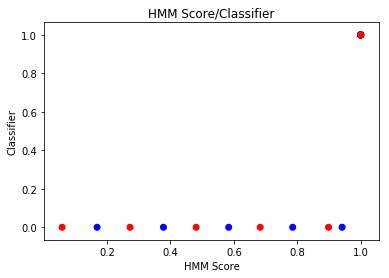

In [109]:
import matplotlib.pyplot as plt

colors=['red','blue']

plt.scatter(hmm_fin, SVM_Y,marker='o',c=colors,label=SVM_Y)
plt.ylabel("Classifier")
plt.xlabel("HMM Score")
plt.title("HMM Score/Classifier")

plt.show()




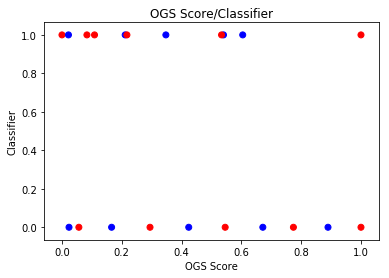

In [110]:
colors=['red','blue']

plt.scatter(OGS_X, SVM_Y, marker='o',c=colors,label=SVM_Y)
plt.ylabel("Classifier")
plt.xlabel("OGS Score")
plt.title("OGS Score/Classifier")

plt.show()

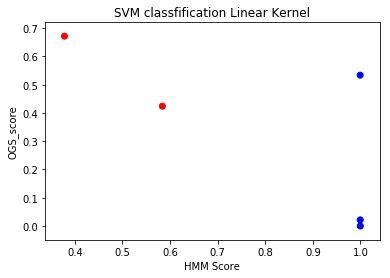

In [111]:
import matplotlib.pyplot as plt
import matplotlib

plt.ylabel("OGS_score")
plt.xlabel("HMM Score")
plt.title("SVM classfification Linear Kernel")
label=y_pred_lin

colors = ['red','blue']
plt.scatter(list(x_test[:,0]), list(x_test[:,1]), c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.show()



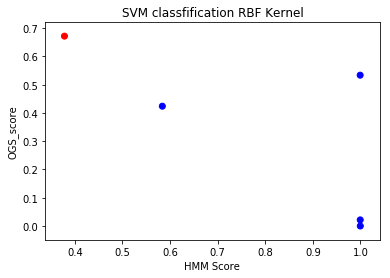

In [112]:
plt.ylabel("OGS_score")
plt.xlabel("HMM Score")
plt.title("SVM classfification RBF Kernel")

label=y_pred_rbf

colors = ['red','blue']
plt.scatter(list(x_test[:,0]), list(x_test[:,1]), c=label, cmap=matplotlib.colors.ListedColormap(colors))


plt.show()

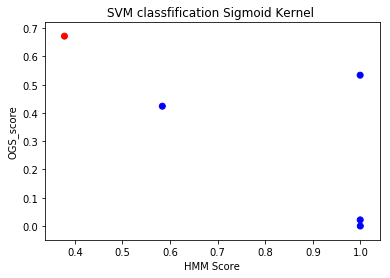

In [113]:

plt.ylabel("OGS_score")
plt.xlabel("HMM Score")
plt.title("SVM classfification Sigmoid Kernel ")
label=y_pred_sig

colors = ['red','blue']
plt.scatter(list(x_test[:,0]), list(x_test[:,1]), c=label, cmap=matplotlib.colors.ListedColormap(colors))

